EN2550 Assignment 01

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_01

In [2]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def imshowBGR(img,ax=plt):
    ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

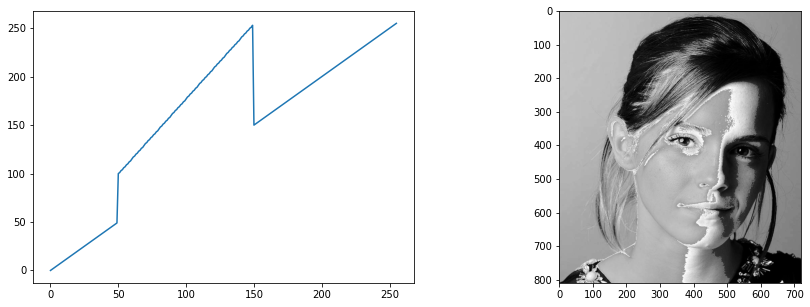

In [3]:
# 1

f=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

t=np.zeros(255-0+1).astype(np.uint8)
r1=np.linspace(0,50,(50+1-0)).astype(np.uint8)
r2=np.linspace(100,255,(150+1-50)).astype(np.uint8)
r3=np.linspace(150,255,(255+1-150)).astype(np.uint8)
t[0:50+1]=r1
t[50:150+1]=r2
t[150:255+1]=r3

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(t)
ax[1].imshow(g,cmap='gray', vmin=0, vmax=255)


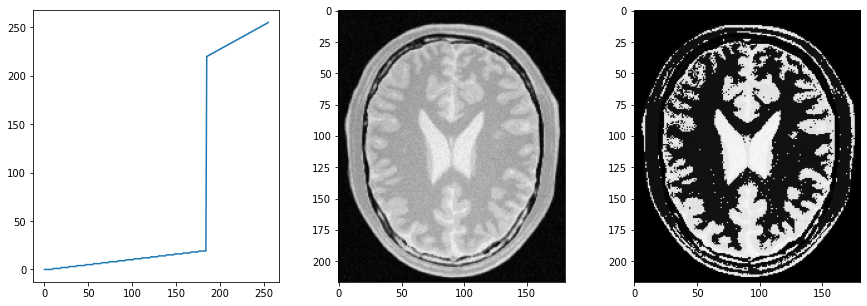

In [18]:
# 2 (a) white matter

f=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert f is not None

a=185
t=np.zeros(256).astype(np.uint8)

r1=np.linspace(0,20,(a+1)).astype(np.uint8)
r2=np.linspace(220,255,(255+1-a)).astype(np.uint8)
t[0:a+1]=r1
t[a:255+1]=r2

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].plot(t)
ax[1].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(g,cmap='gray', vmin=0, vmax=255)


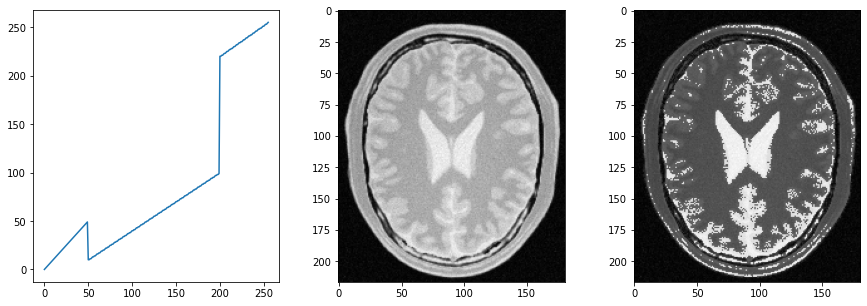

In [3]:
# 2 (b) gray matter

f=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert f is not None

a1,a2=50,200
t=np.zeros(256).astype(np.uint8)
r1=np.linspace(0,50,(a1+1-0)).astype(np.uint8)
r2=np.linspace(10,100,(a2+1-a1)).astype(np.uint8)
r3=np.linspace(220,255,(255+1-a2)).astype(np.uint8)
t[0:a1+1]=r1
t[a1:a2+1]=r2
t[a2:255+1]=r3

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(t)
ax[1].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(g,cmap='gray', vmin=0, vmax=255)

In [61]:
a=np.array([0,0,0,0,0,0,0])
a=np.insert(a,5,2)
a

array([0, 0, 0, 0, 0, 2, 0, 0])